# 1. Importing libraries and data

# 2. Data Wrangling

# 3. Time-series analysis: decomposition

# 4. Testing for stationarity

# 5. Stationarizing GDP per Capita Quarterly Percentage Changes

----

# 1. Importing libraries and data

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8-talk')

In [140]:
#Creating Pathway for data
path =(r'C:\Users\colmu\Desktop\Documents\GitHub Documents\CF_WHR')

In [141]:
#Importing dataset OECD Gross domestic product (GDP)
df_OECD =pd.read_csv(os.path.join(path,'data','original Data','GDP by Country',"OECD GDP quartertly 2007 to 2020.csv"))
df_OECD

LOCATION INDICATOR SUBJECT   MEASURE FREQUENCY     TIME      Value  \
0         KOR      QGDP     TOT  PC_CHGPP         Q  2007-Q3   1.173831   
1         KOR      QGDP     TOT  PC_CHGPP         Q  2007-Q4   2.156949   
2         KOR      QGDP     TOT  PC_CHGPP         Q  2008-Q1   0.402395   
3         KOR      QGDP     TOT  PC_CHGPP         Q  2008-Q2   0.523473   
4         KOR      QGDP     TOT  PC_CHGPP         Q  2008-Q3   0.815881   
...       ...       ...     ...       ...       ...      ...        ...   
2886      HRV      QGDP     TOT  PC_CHGPP         Q  2019-Q4  -0.564373   
2887      HRV      QGDP     TOT  PC_CHGPP         Q  2020-Q1  -1.344949   
2888      HRV      QGDP     TOT  PC_CHGPP         Q  2020-Q2 -14.491617   
2889      HRV      QGDP     TOT  PC_CHGPP         Q  2020-Q3   5.488159   
2890      HRV      QGDP     TOT  PC_CHGPP         Q  2020-Q4   8.207861   

     Flag Codes  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
2886        NaN  
2887        NaN  
2888        NaN  
2889        NaN  
2890        NaN  

[2891 rows x 8 columns]

# 2. Data Wrangling

In [142]:
df_OECD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    2891 non-null   object 
 1   INDICATOR   2891 non-null   object 
 2   SUBJECT     2891 non-null   object 
 3   MEASURE     2891 non-null   object 
 4   FREQUENCY   2891 non-null   object 
 5   TIME        2891 non-null   object 
 6   Value       2891 non-null   float64
 7   Flag Codes  44 non-null     object 
dtypes: float64(1), object(7)
memory usage: 180.8+ KB


In [143]:
# Checking for missing values 

df_OECD.isnull().sum() 

LOCATION         0
INDICATOR        0
SUBJECT          0
MEASURE          0
FREQUENCY        0
TIME             0
Value            0
Flag Codes    2847
dtype: int64

In [144]:
# Check for duplicates

dups = df_OECD.duplicated()
dups.sum()

# No dups!

0

In [145]:
df_OECD.columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes'],
      dtype='object')

In [146]:
#checking countries 
df_OECD['LOCATION'].value_counts() 

LOCATION
KOR          54
POL          54
IDN          54
LUX          54
ZAF          54
RUS          54
PRT          54
ITA          54
AUT          54
IRL          54
CHE          54
NZL          54
CHL          54
SWE          54
FRA          54
GRC          54
OECDE        54
G-7          54
G-20         54
COL          54
LTU          54
BGR          54
ROU          54
EU27_2020    54
CRI          54
AUS          54
DEU          54
CZE          54
LVA          54
ISL          54
GBR          54
EST          54
DNK          54
ESP          54
JPN          54
OECD         54
NOR          54
HUN          54
CAN          54
ARG          54
SVN          54
FIN          54
BRA          54
NLD          54
USA          54
SVK          54
MEX          54
BEL          54
ISR          54
TUR          54
IND          54
HRV          54
SAU          43
CHN          40
Name: count, dtype: int64

GDP_per_capita was chosen for the focus of thislinear regression as it was found to have a moderate correlation to happiness_scores in the previous hypothesis testing. Data was pulled for the OECD data bank due to teh Nasdaq website link currently being down for pulling.

Due to this data originating from a different source than the World Bank, it encompasses a more restricted set of countries—approximately half compared to the primary dataset. However, this dataset serves a unique purpose in ongoing linear regression techniques in its quarterly breakdown of GDP_per_capita, offering a wealth of data points for analyses. Notably. I have confined the data to the past 15 years, extending one year beyond 2019, the last year of the analyzed World Happiness Reports and gone back to 2007,approximatly 15 years into the past of the available financial content on the OECD website.

Given the primary data set already contains GDP per capita , GDP per cpaita annual growth and GDP for all contained counties on an annual scale, the LOCATION column will not be aggregated into the primary dataset for this analysis and quartly breakdown for GDP is not required for additional analysis beyond the scope of this script.

In [147]:
#dropping columns unrequired for analysis

df_OECD = df_OECD.drop(columns = ['LOCATION','INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'])

df_OECD

TIME      Value
0     2007-Q3   1.173831
1     2007-Q4   2.156949
2     2008-Q1   0.402395
3     2008-Q2   0.523473
4     2008-Q3   0.815881
...       ...        ...
2886  2019-Q4  -0.564373
2887  2020-Q1  -1.344949
2888  2020-Q2 -14.491617
2889  2020-Q3   5.488159
2890  2020-Q4   8.207861

[2891 rows x 2 columns]

In [148]:
#renaming columns for clarity

df_OECD.rename(columns={'TIME':'date'}, inplace=True)

df_OECD

date      Value
0     2007-Q3   1.173831
1     2007-Q4   2.156949
2     2008-Q1   0.402395
3     2008-Q2   0.523473
4     2008-Q3   0.815881
...       ...        ...
2886  2019-Q4  -0.564373
2887  2020-Q1  -1.344949
2888  2020-Q2 -14.491617
2889  2020-Q3   5.488159
2890  2020-Q4   8.207861

[2891 rows x 2 columns]

### Seperating 'year' and 'Q' into a numeric date and dropping previous columns

In [149]:
df_OECD['year'] = df_OECD['date'].str.extract(r'(\d{4})')
df_OECD['quarter'] = df_OECD['date'].str.extract(r'Q(\d)')

# Add leading zero to single-digit quarters
df_OECD['quarter'] = df_OECD['quarter'].str.zfill(2)

# Constructing a new datetime column
df_OECD['datetime'] = pd.to_datetime(df_OECD['year'] + '-' + df_OECD['quarter'], format='%Y-%m')


# Print or use the DataFrame as needed
print(df_OECD.head())

      date     Value  year quarter   datetime
0  2007-Q3  1.173831  2007      03 2007-03-01
1  2007-Q4  2.156949  2007      04 2007-04-01
2  2008-Q1  0.402395  2008      01 2008-01-01
3  2008-Q2  0.523473  2008      02 2008-02-01
4  2008-Q3  0.815881  2008      03 2008-03-01


In [150]:
#dropping columns unrequired for analysis

df_OECD = df_OECD.drop(columns = ['date', 'year', 'quarter'])

df_OECD

Value   datetime
0      1.173831 2007-03-01
1      2.156949 2007-04-01
2      0.402395 2008-01-01
3      0.523473 2008-02-01
4      0.815881 2008-03-01
...         ...        ...
2886  -0.564373 2019-04-01
2887  -1.344949 2020-01-01
2888 -14.491617 2020-02-01
2889   5.488159 2020-03-01
2890   8.207861 2020-04-01

[2891 rows x 2 columns]

In [151]:
#Checking Data types
df_OECD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Value     2891 non-null   float64       
 1   datetime  2891 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 45.3 KB


Text(0.5, 1.0, 'GDP per Capita Quartly Percentange Changes')

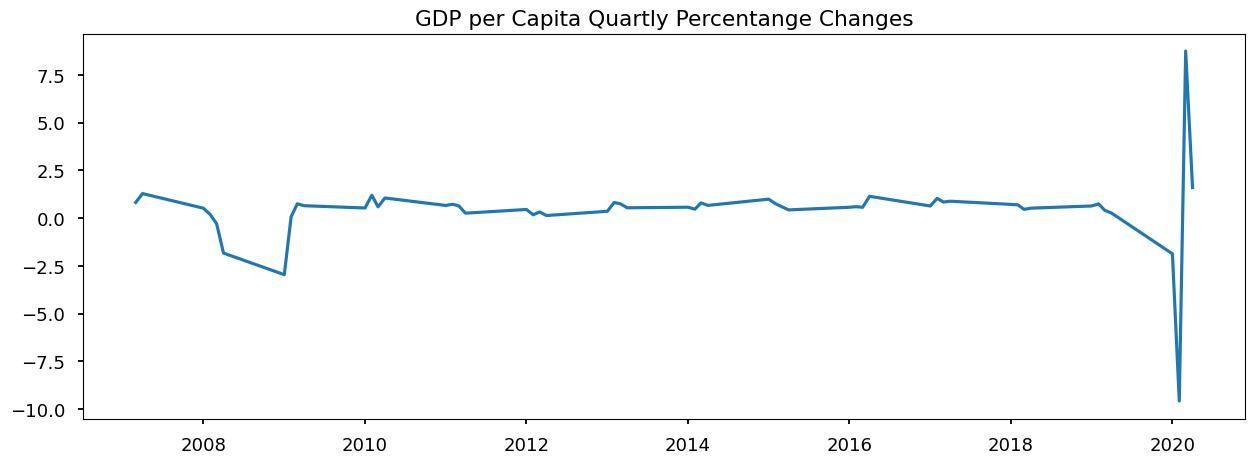

In [152]:
# Calculate the mean of the 'Value' column grouped by 'datetime'
GDP = df_OECD.groupby('datetime')['Value'].mean()

# Initial plot using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(GDP)
plt.title('GDP per Capita Quartly Percentange Changes')

The initial analysis of aggregated GDP data initially shows the most variation around 2008 and in 2020,  aligning with the global financial crisis and the subsequent pandemic. during the intervening years from 2015 to 2019, the data trend initially appears relatively flat suggesting a period of minimal changes ion worldwide economic stability. By removing the outlier year of 2020, further analysis may provide additional clarity to further analyzepossible fluctuationes without the prescence of a major wordwide economic crisis.

### Subsetting DATA

In [153]:
# Set 'datetime' column as the index
df_OECD.set_index('datetime', inplace=True)

# Calculate the mean of the 'Value' column grouped by 'datetime'
GDP = df_OECD.groupby('datetime')['Value'].mean().reset_index()

# Print or use the resulting DataFrame as needed
print(GDP.head())

    datetime     Value
0 2007-03-01  0.818998
1 2007-04-01  1.282120
2 2008-01-01  0.517388
3 2008-02-01  0.183225
4 2008-03-01 -0.295664


In [154]:
data_sub = GDP.loc[(GDP['datetime'] >= '2007') & (GDP['datetime'] < '2020')]

data_sub.shape

(50, 2)


Subsetting back to 2007 provides context leading up to the initiation of the WHR survey in 2012. Concluding the subset in 2019 marks the endpoint of the primary datase.n

In [155]:
# Set frequency for the datetime index
data_sub.index.freq = 'Q'

In [156]:
print(data_sub.index.freq)

Q


In [157]:
data_sub.head()

datetime     Value
0 2007-03-01  0.818998
1 2007-04-01  1.282120
2 2008-01-01  0.517388
3 2008-02-01  0.183225
4 2008-03-01 -0.295664

In [158]:
# Set the "datetime" column as the index

from datetime import datetime

data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.

data_sub.head()

Value
datetime            
2007-03-01  0.818998
2007-04-01  1.282120
2008-01-01  0.517388
2008-02-01  0.183225
2008-03-01 -0.295664

In [159]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

Value    0
dtype: int64

In [160]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

Text(0.5, 1.0, 'GDP per Capita Quartly Percentange Changes')

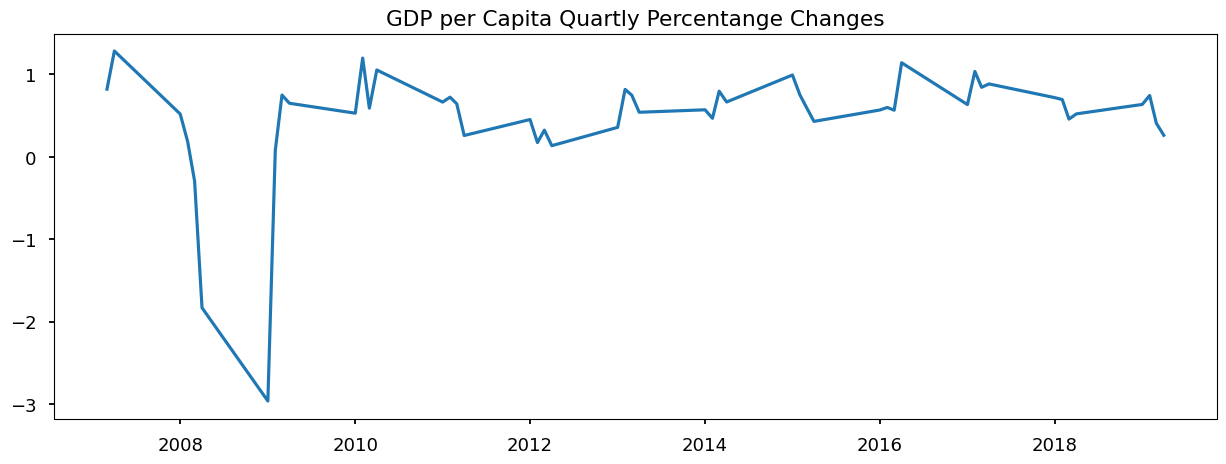

In [161]:
# plot using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(data_sub)
plt.title('GDP per Capita Quartly Percentange Changes')

Due to observed noise in the data, a rolling mean will be calculated first before analysis.

### Calculating Rolling mean

In [163]:
# Calculate the rolling mean
window_size = 3
rolling_average = data_sub['Value'].rolling(window=window_size).mean()

# Create a new DataFrame for the rolling average
rolling_average_subset = pd.DataFrame({'datetime': data_sub.index, 'rolling_average': rolling_average})

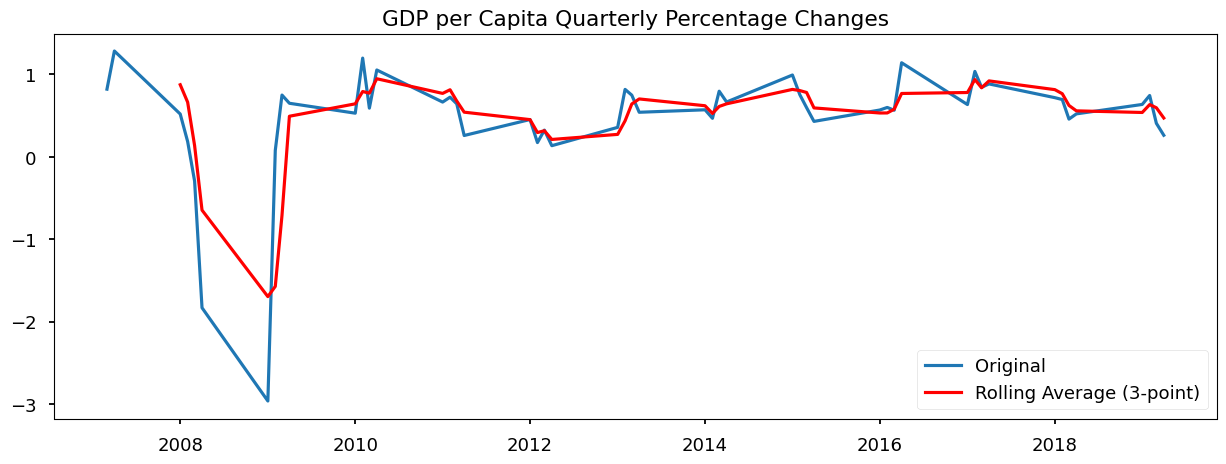

In [164]:
# Plot using matplotlib
plt.figure(figsize=(15, 5), dpi=100)

# Plot the original data
plt.plot(data_sub.index, data_sub['Value'], label='Original')

# Plot the rolling average
plt.plot(rolling_average_subset['datetime'], rolling_average_subset['rolling_average'],
         label=f'Rolling Average ({window_size}-point)', color='red')

plt.title('GDP per Capita Quarterly Percentage Changes')
plt.legend()
plt.show()

The year of 2009 continues to depict negative trends due to financial crises at that time in the world. After calculating the moving average it does reduce the overall noise from year to year and the trend remains overall horizontal from the years of 2010 to 2018 indicating that during the time of the World Happiness Report data set worldwide GDP per capita changes overall remained consistent with no significant worldwide econimic indicators during this time.

# 3. Time-series analysis: decomposition

Data is not linear so a multiplicative model will be used. For comparisons I ran both models to have in this script side by side for learning purposes. 

----

In [165]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period=4)

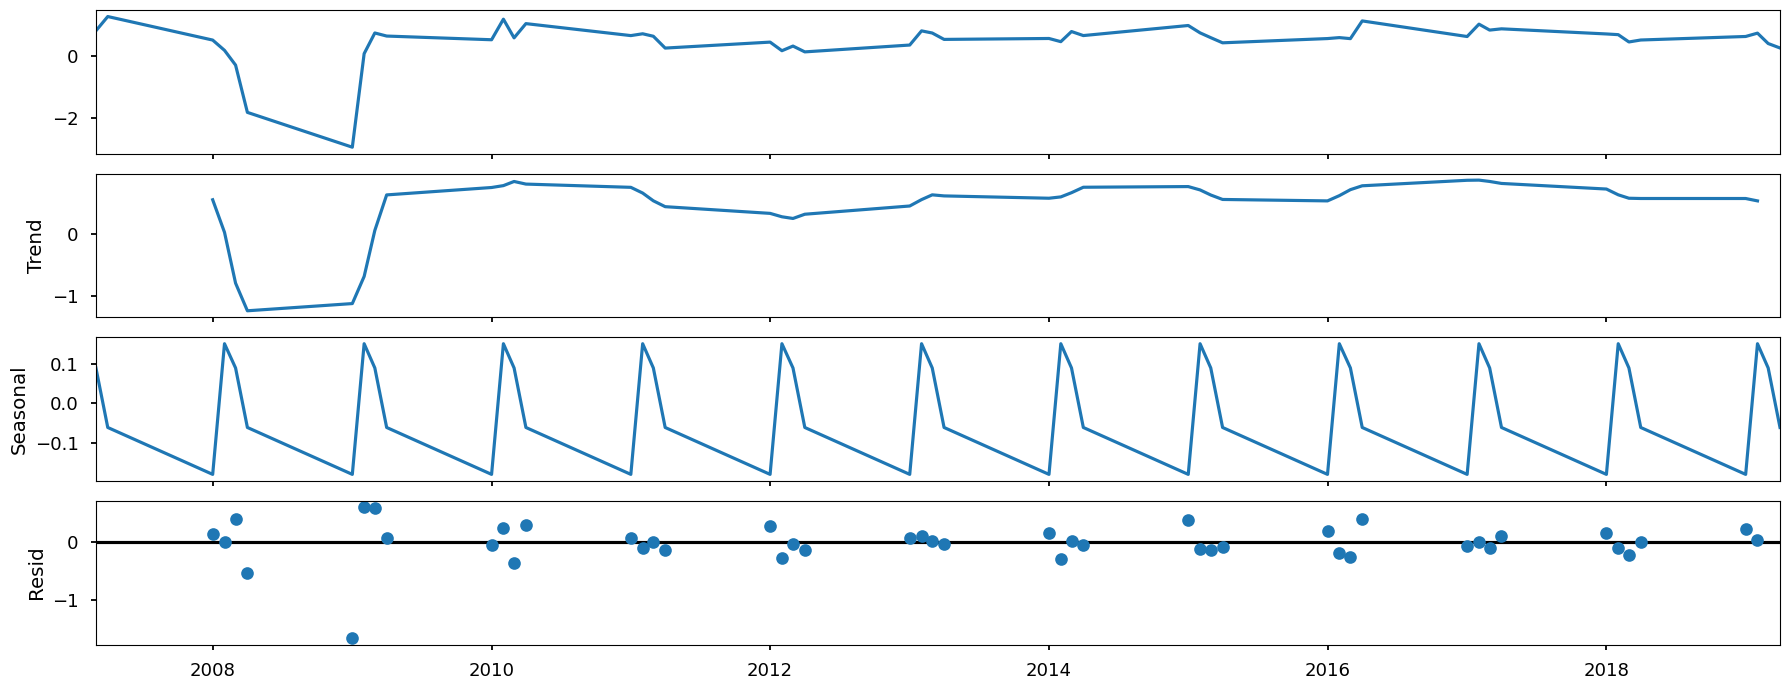

In [166]:
# chart for additive model

from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

# Plot the separate components

decomposition.plot()
plt.show()

---

In [167]:
#  Since data has negative integers the first line is added to make the values constant for the algorythm to run.
data_sub['Value_positive'] = data_sub['Value'] + abs(data_sub['Value'].min()) + 1

# Decompose the time series using a multiplicative model
decomposition = sm.tsa.seasonal_decompose(data_sub['Value_positive'], model='multiplicative', period=4)

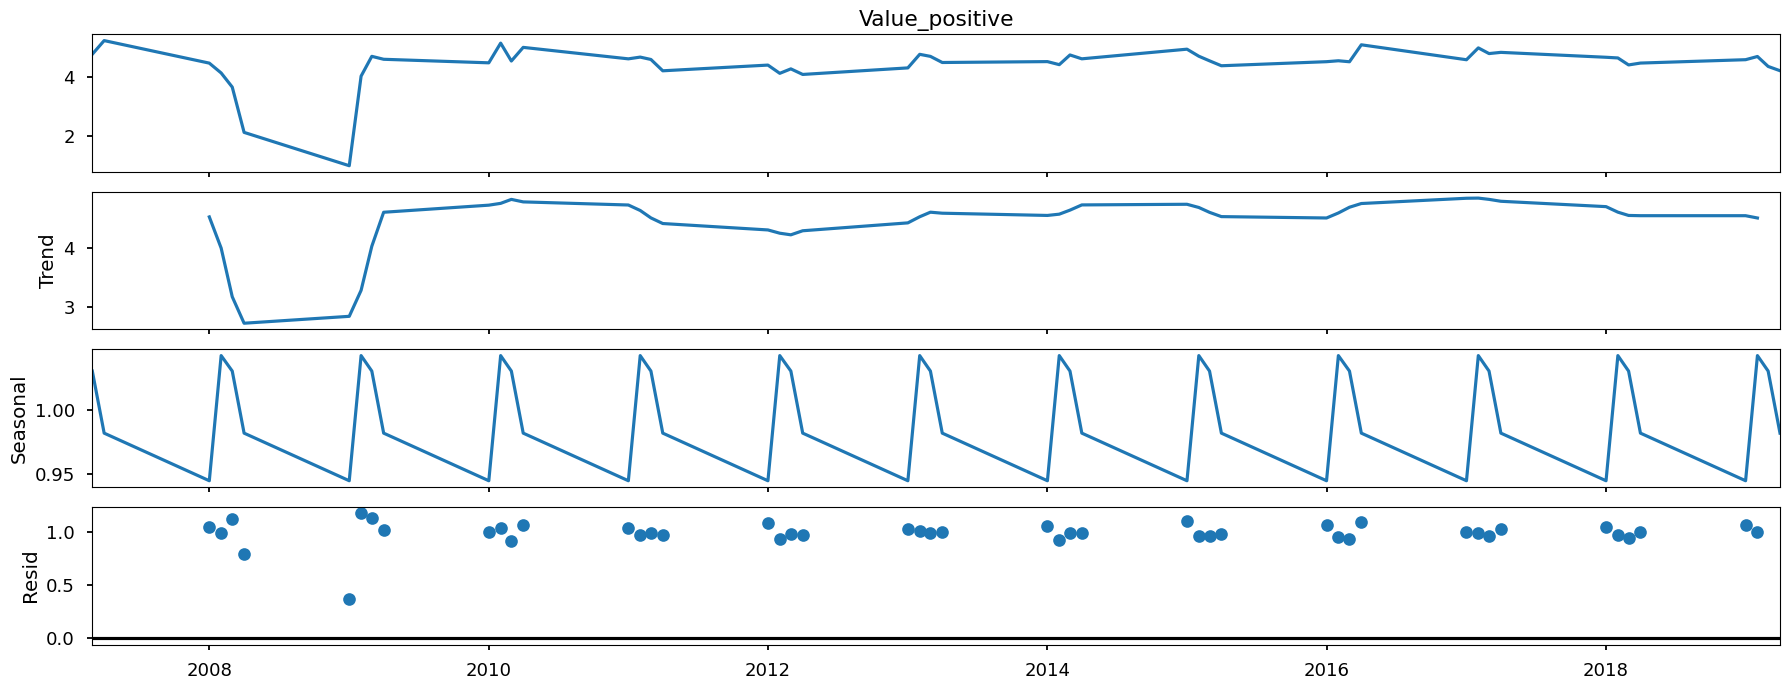

In [168]:
# chart for multiplicative model

from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

# Plot the separate components

decomposition.plot()
plt.show()

the pattern being bserved in the data is due to the way the data was recorded in python duringthe wrangling phase of this process. The data was provided in year-quarter and when convertered to datetime, was put into teh months of january, february, march, and april which would account for the clustering atthe start of the year and general fluctuations in this data. if data was dispersed accuratly throughout the year, I suspect we would see more of a horzontal trend with limited noise.

# 4. Testing for stationarity

In [181]:
#preforming the dickey fuller test

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.286906
p-value                         0.015474
Number of Lags Used             2.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


highly significant result

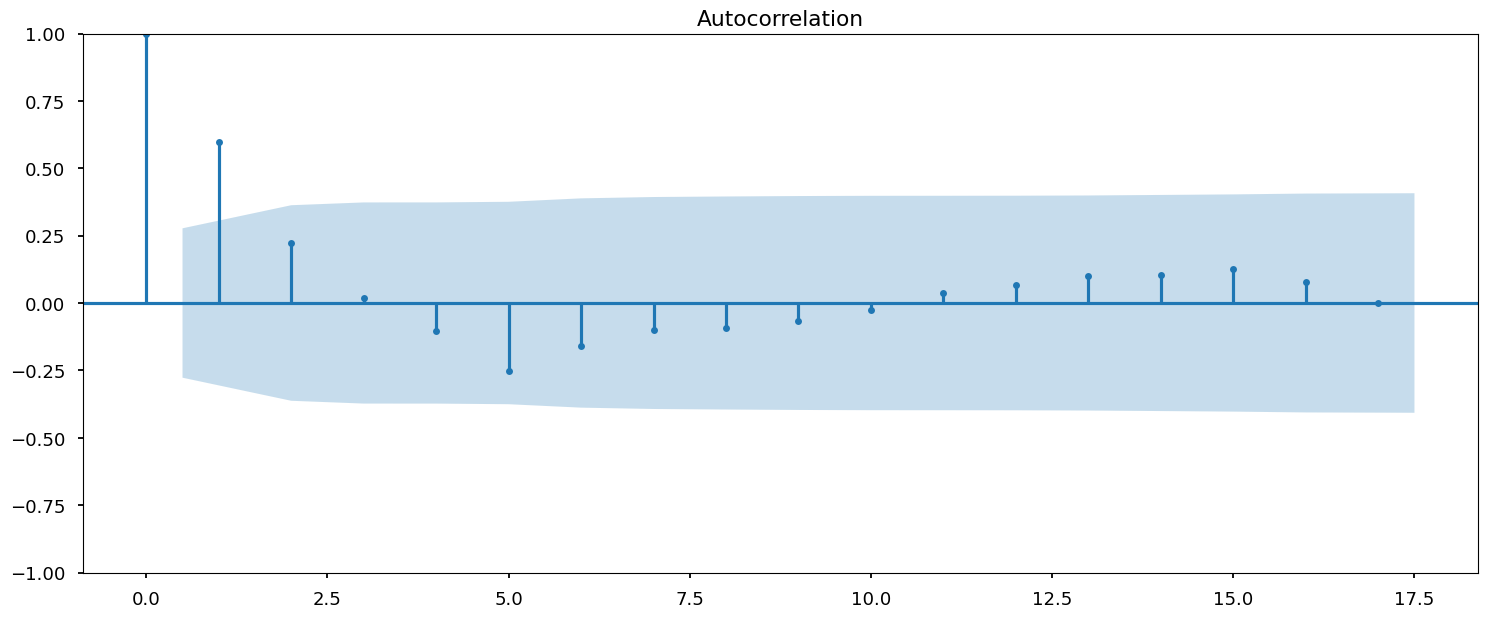

In [171]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub['Value'])
plt.show()

confirmed by the autocorrelational chart

# 5. Stationarizing GDP per Capita Quarterly Percentage Changes

This part is not necessary for my analysis, but I completed it for the expericence.

In [172]:
# usingthe  df.shift(1) function to turn the observation to t-1, making the whole thing t - (t -1)
data_diff = data_sub - data_sub.shift(1) 

In [173]:
#removing missing values from the differencing process to rerun the dickey fuller test
data_diff.dropna(inplace = True) 

In [174]:
data_diff.head()

Value  Value_positive
datetime                            
2007-04-01  0.463122        0.463122
2008-01-01 -0.764732       -0.764732
2008-02-01 -0.334164       -0.334164
2008-03-01 -0.478888       -0.478888
2008-04-01 -1.537266       -1.537266

In [175]:
data_diff.columns

Index(['Value', 'Value_positive'], dtype='object')

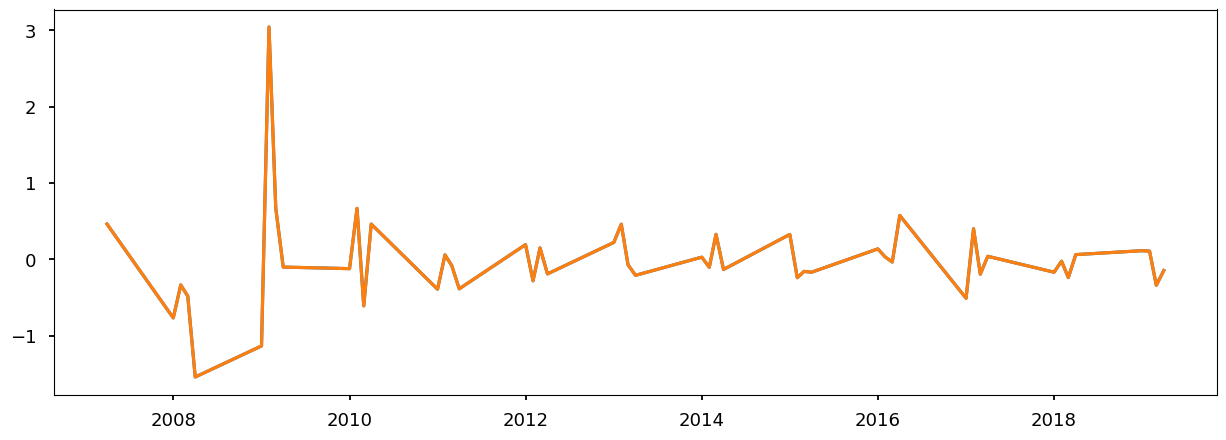

In [176]:
# rerunning the curve after differencing

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [179]:
dickey_fuller(data_diff['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                -7.126549e+00
p-value                        3.607776e-10
Number of Lags Used            0.000000e+00
Number of Observations Used    4.800000e+01
Critical Value (1%)           -3.574589e+00
Critical Value (5%)           -2.923954e+00
Critical Value (10%)          -2.600039e+00
dtype: float64


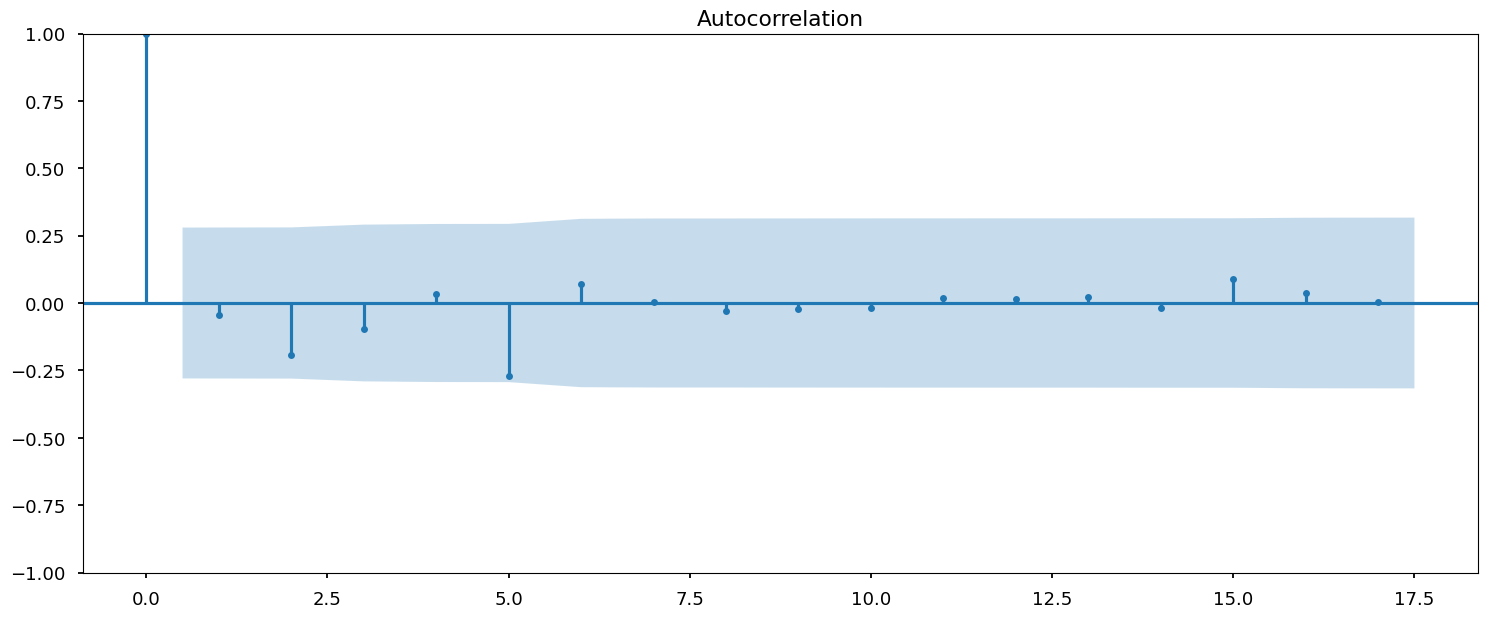

In [180]:
plot_acf(data_diff['Value'])
plt.show()